In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, fbeta_score, roc_auc_score, roc_curve
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
    
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB

from xgboost import XGBClassifier

np.set_printoptions(suppress=True)

%matplotlib inline

In [156]:
def APRF2(act_t, pred_t, act_v, pred_v, th = 0.5, title=''):
    print(title)
    plt.figure(figsize=(6,6))
    
    plt.subplot(2,1,1)
    cm = confusion_matrix(act_t, pred_t)
    sns.heatmap(cm, cmap='Blues', square=True,
                annot=True, fmt='d',
               xticklabels=['No Default', 'Default'],
               yticklabels=['No Default', 'Default'])
    plt.title("Confusion Matrix")
    plt.ylabel("Defaults Actual")
    plt.xlabel("Defaults Predicted")
    
    plt.subplot(2,1,2)
    cm = confusion_matrix(act_v, pred_v)
    sns.heatmap(cm, cmap='Reds', square=True,
                annot=True, fmt='d',
               xticklabels=['No Default', 'Default'],
               yticklabels=['No Default', 'Default'])
    plt.title("Confusion Matrix")
    plt.ylabel("Defaults Actual")
    plt.xlabel("Defaults Predicted")
    
    plt.tight_layout()
    
    print("Training:")
    print("Accuracy:  {}".format(accuracy_score(act_t, pred_t)))
    print("Precision: {}".format(precision_score(act_t, pred_t, zero_division=0)))
    print("Recall:    {}".format(recall_score(act_t, pred_t, zero_division=0)))
    print("F1:        {}".format(f1_score(act_t, pred_t)))
    print("Fbeta:     {}".format(fbeta_score(act_t, pred_t, beta =2 )))
    print()
    print("Validation:")
    print("Accuracy:  {}".format(accuracy_score(act_v, pred_v)))
    print("Precision: {}".format(precision_score(act_v, pred_v, zero_division=0)))
    print("Recall:    {}".format(recall_score(act_v, pred_v, zero_division=0)))
    print("F1:        {}".format(f1_score(act_v, pred_v)))
    print("Fbeta:     {}".format(fbeta_score(act_v, pred_v, beta=2)))

  

In [157]:
with open('X_xtra1.pkl', "rb") as file:
    X = pickle.load(file)
with open('y_xtra1.pkl', "rb") as file:
    y = pickle.load(file)



In [158]:
X.shape, y.shape

((887379, 1023), (887379,))

## Train / Validation / Test split

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2018)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=2019)

In [160]:
import imblearn.under_sampling

# setup for the ratio argument of RandomOverSampler initialization
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
ratio = {1 : n_pos , 0 : n_neg} 

# randomly oversample positive samples: create 4x as many 
RUS = imblearn.under_sampling.RandomUnderSampler(sampling_strategy = 1, random_state=42) 
    
X_tr_rs, y_tr_rs = RUS.fit_resample(X_train, y_train)

X_tr_rs.shape, y_tr_rs.shape

((54296, 1023), (54296,))

In [161]:
# lr = LogisticRegression(solver='liblinear') 
# lr.fit(X_tr, y_tr)

# print('Simple Logistic Regression; Test F1: %.3f, Test AUC: %.3f' % \
#       (f1_score(y_te, lr.predict(X_te)), roc_auc_score(y_te, lr.predict_proba(X_te)[:,1]))) 

# lr_os = LogisticRegression(solver='liblinear') 
# lr_os.fit(X_tr_rs, y_tr_rs)

# print('Logistic Regression on Oversampled Train Data; Test F1: %.3f, Test AUC: %.3f' % \
#       (f1_score(y_te, lr_os.predict(X_te)), roc_auc_score(y_te, lr_os.predict_proba(X_te)[:,1])))

## Dummy Classifier

Dummy - Train
Training:
Accuracy:  0.5
Precision: 0.0
Recall:    0.0
F1:        0.0
Fbeta:     0.0

Validation:
Accuracy:  0.9490071897045235
Precision: 0.0
Recall:    0.0
F1:        0.0
Fbeta:     0.0


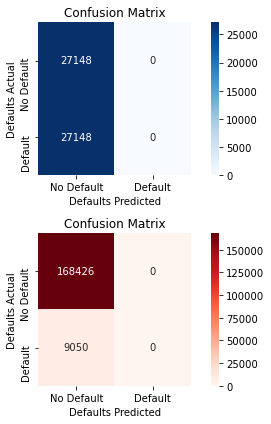

In [162]:
dum = DummyClassifier(strategy="most_frequent")
dum.fit(X_tr_rs, y_tr_rs)
y_pred_dum = dum.predict(X_tr_rs)
y_pred_dum2 = dum.predict(X_val)

APRF2(y_tr_rs, y_pred_dum, y_val, y_pred_dum2, title = "Dummy - Train")

## Decision Tree Classifier

In [163]:
dt = DecisionTreeClassifier()
dt.fit(X_tr_rs, y_tr_rs)

DecisionTreeClassifier()


Training:
Accuracy:  1.0
Precision: 1.0
Recall:    1.0
F1:        1.0
Fbeta:     1.0

Validation:
Accuracy:  0.5588023169329938
Precision: 0.06456237424547284
Recall:    0.567292817679558
F1:        0.11593090211132438
Fbeta:     0.22182855167646043


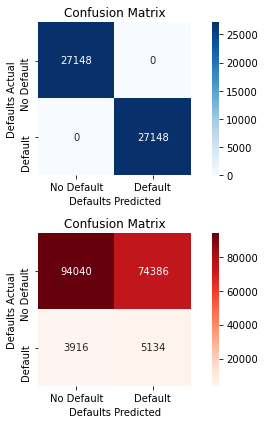

In [164]:
y_preds_tree = dt.predict(X_tr_rs)
y_preds_tree2 = dt.predict(X_val)

APRF2(y_tr_rs, y_preds_tree, y_val, y_preds_tree2 )

Best params: {'splitter': 'best', 'max_features': 518, 'max_depth': 8}

Training:
Accuracy:  0.6323486076322381
Precision: 0.6351564851038218
Recall:    0.6219611021069692
F1:        0.6284895406833916
Fbeta:     0.6245561342250103

Validation:
Accuracy:  0.6131251549505286
Precision: 0.07582506724351402
Recall:    0.5887292817679558
F1:        0.13434698740496995
Fbeta:     0.25021837752543036


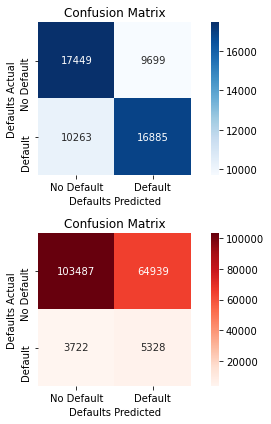

In [165]:
param_grid = {'max_depth':np.arange(1,101),
              'splitter':['random', 'best'],
              'max_features': range(1, X_tr_rs.columns.size)}
dtcr = RandomizedSearchCV(estimator=dt, cv=5, param_distributions = param_grid,
                    scoring='f1', n_iter=40)
dtcr.fit(X_tr_rs, y_tr_rs)
print(f"Best params: {dtcr.best_params_}")
y_predict = dtcr.predict(X_tr_rs)

y_predict2 = dtcr.predict(X_val)

confusion_matrix(y_tr_rs,y_predict)
APRF2(y_tr_rs, y_predict, y_val, y_predict2)

In [166]:
X_train.columns.size


1023

## Random Forest Classifier

In [167]:
rf = RandomForestClassifier()
rf.fit(X_tr_rs, y_tr_rs)
print(rf.score(X_tr_rs, y_tr_rs))

1.0



Training:
Accuracy:  1.0
Precision: 1.0
Recall:    1.0
F1:        1.0
Fbeta:     1.0

Validation:
Accuracy:  0.63467173026212
Precision: 0.08367289064015881
Recall:    0.6194475138121547
F1:        0.14743126142355586
Fbeta:     0.27161115902285876


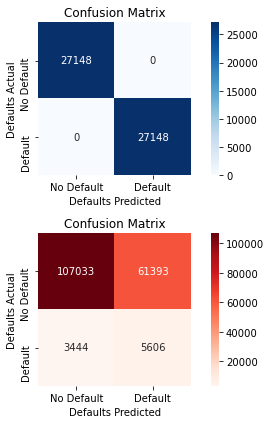

In [168]:
y_preds_rf = rf.predict(X_tr_rs)
y_preds_rf2 = rf.predict(X_val)
APRF2(y_tr_rs, y_preds_rf, y_val, y_preds_rf2)

In [169]:
# param_grid = {'n_estimators':[50, 100, 150, 200],
#               'criterion':['gini', 'entropy'],
#               'max_depth': [5, 10, 20, 30],
#               'max_features': [5, 10, 20, 30, 50, X_train.columns.size]}


# rfcv = GridSearchCV(estimator=rf, cv=5, param_grid = param_grid,
#                     scoring='f1')

param_grid = {'n_estimators':[50, 100, 150, 200],
              'criterion':['gini', 'entropy'],
              'max_depth': [5, 10, 20, 30],
              'max_features': [5, 10, 20, 30, 50, X_train.columns.size]}

rfcv = RandomizedSearchCV(estimator=rf, cv=5, param_distributions = param_grid,
                    scoring='f1', n_iter=10)

rfcv.fit(X_tr_rs, y_tr_rs)
print(f"Best params: {rfcv.best_params_}")
y_predict = rfcv.predict(X_tr_rs)

y_predict2 = rfcv.predict(X_val)

confusion_matrix(y_tr_rs,y_predict)
APRF2(y_tr_rs, y_predict, y_val, y_predict2)

KeyboardInterrupt: 

## XGB

In [171]:
xclf = XGBClassifier(use_label_encoder=False)
xclf.fit(X_tr_rs, y_tr_rs)

ValueError: feature_names must be string, and may not contain [, ] or <


Training:
Accuracy:  0.709186680418447
Precision: 0.7062091503267974
Recall:    0.7164063651097686
F1:        0.7112712112346401
Fbeta:     0.7143434313754297

Validation:
Accuracy:  0.6231603146340914
Precision: 0.08326127060993889
Recall:    0.6383425414364641
F1:        0.14730856516306703
Fbeta:     0.27357364752235186


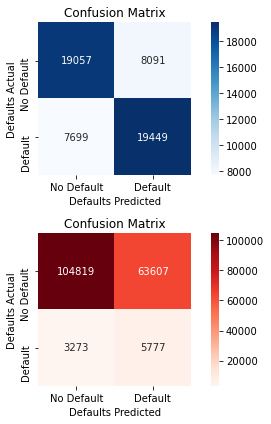

In [134]:
y_pred = xclf.predict(X_tr_rs)
y_pred2 = xclf.predict(X_val)

APRF2(y_tr_rs, y_pred, y_val, y_pred2)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/core.py", line 422, in inner_f
    return f(**kwargs)
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py", line 909, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/training.py", line 227, in train
    bst = _train_internal(params, dtrain,
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/training.py", line 102, in _train_internal
    bst.update(dtrai

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/core.py", line 422, in inner_f
    return f(**kwargs)
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py", line 909, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/training.py", line 227, in train
    bst = _train_internal(params, dtrain,
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/training.py", line 102, in _train_internal
    bst.update(dtrai

[00:31:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:31:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/core.py", line 422, in inner_f
    return f(**kwargs)
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py", line 909, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/training.py", line 227, in train
    bst = _train_internal(params, dtrain,
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/training.py", line 102, in _train_internal
    bst.update(dtrai

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/core.py", line 422, in inner_f
    return f(**kwargs)
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py", line 909, in fit
    self._Booster = train(xgb_options, train_dmatrix,
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/training.py", line 227, in train
    bst = _train_internal(params, dtrain,
  File "/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/training.py", line 102, in _train_internal
    bst.update(dtrai

[00:31:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best params: {'colsample_bytree': 0.6879505109705024, 'learning_rate': 0.10224650453376416, 'max_depth': 8, 'min_child_weight': 1, 'n_estimators': 341, 'subsample': 0.6760329624689282}

Training:
Accuracy:  0.8121224399587447
Precision: 0.8098738343390016
Recall:    0.8157506998673936
F1:        0.8128016442478849
Fbeta:     0.8145685133554514

Validation:
Accuracy:  0.6223714755797967
Precision: 0.08270947307803052
Recall:    0.6348066298342542
F1:        0.14635078333970195
Fbeta:     0.27186257808063596


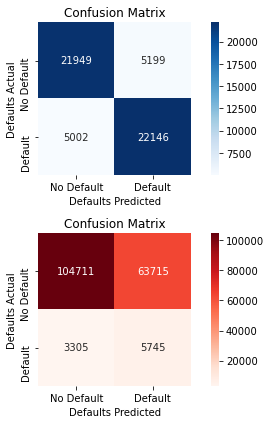

In [138]:
import scipy.stats as stats

param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.6),
              'subsample': stats.uniform(0.3, 0.9),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.9),
              'min_child_weight': [1, 2, 3, 4]
             }

# numFolds = 5
# kfold_5 = cross_validation.KFold(n = len(X), shuffle = True, n_folds = numFolds)

clf = RandomizedSearchCV(xclf, 
                         param_distributions = param_dist,
                         cv = 5,  
                         n_iter = 5, 
                         scoring = 'f1')

clf.fit(X_tr_rs, y_tr_rs)
print(f"Best params: {clf.best_params_}")
y_predict = clf.predict(X_tr_rs)

y_predict2 = clf.predict(X_val)

confusion_matrix(y_tr_rs,y_predict)
APRF2(y_tr_rs, y_predict, y_val, y_predict2)

## Logistic Regression

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC AUC   0.687216196670287
ROC AUC   0.6677124442342434

Training:
Accuracy:  0.635976867540887
Precision: 0.6367678114927198
Recall:    0.6330853101517607
F1:        0.6349212213007258
Fbeta:     0.6338183990618294

Validation:
Accuracy:  0.6210698911402105
Precision: 0.0807871270726191
Recall:    0.6196685082872928
F1:        0.14293906992748542
Fbeta:     0.26548756355510955


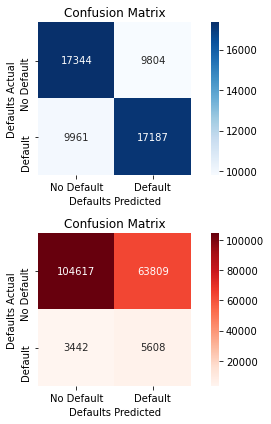

In [172]:
#lr = LogisticRegression(C=1000, class_weight='balanced' )
lr = LogisticRegression()

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_tr_rs)
X_val_scaled = ss.transform(X_val)

lr.fit(X_train_scaled, y_tr_rs)

lr.score(X_train_scaled, y_tr_rs)

y_preds = lr.predict(X_train_scaled)
y_preds2 = lr.predict(X_val_scaled)

print('ROC AUC   {}'.format(roc_auc_score(y_tr_rs, lr.predict_proba(X_train_scaled)[:,1])))
print('ROC AUC   {}'.format(roc_auc_score(y_val, lr.predict_proba(X_val_scaled)[:,1])))

APRF2(y_tr_rs, y_preds, y_val, y_preds2)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

Best params: {'C': 2000, 'class_weight': 'balanced'}

Training:
Accuracy:  0.6358295270369825
Precision: 0.6366297380414243
Recall:    0.63290113452188
F1:        0.6347599608400908
Fbeta:     0.6336433571075594

Validation:
Accuracy:  0.6210360837521693
Precision: 0.08081637356148007
Recall:    0.62
F1:        0.14299366709565614
Fbeta:     0.26559940925314074


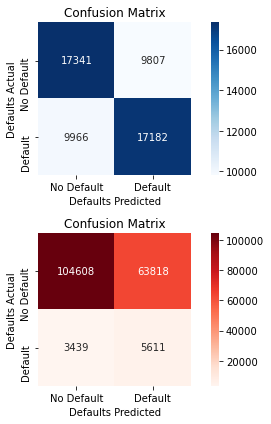

In [173]:
param_grid = {'C':[100, 200, 500, 1000, 1500, 2000],
              "class_weight":['balanced', None]}
lrcv = GridSearchCV(estimator=lr, cv=5, param_grid = param_grid)
lrcv.fit(X_train_scaled, y_tr_rs)
print(f"Best params: {lrcv.best_params_}")
y_predict = lrcv.predict(X_train_scaled)

y_predict2 = lrcv.predict(X_val_scaled)

confusion_matrix(y_tr_rs,y_predict)
APRF2(y_tr_rs, y_predict, y_val, y_predict2)

## KNN

In [179]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_scaled, y_tr_rs)
knn.score(X_train_scaled, y_tr_rs)

0.7627817887137174


Training:
Accuracy:  0.5
Precision: 0.0
Recall:    0.0
F1:        0.0
Fbeta:     0.0

Validation:
Accuracy:  0.9490071897045235
Precision: 0.0
Recall:    0.0
F1:        0.0
Fbeta:     0.0


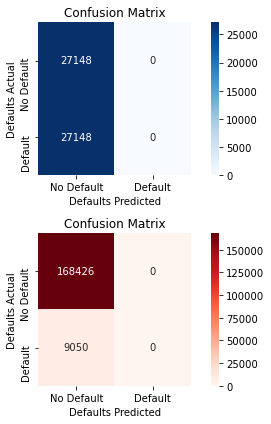

In [180]:
y_preds_knn = knn.predict(X_tr_rs)
y_preds_knn2 = knn.predict(X_val)


APRF2(y_tr_rs, y_preds_knn, y_val, y_preds_knn2)

In [ ]:
param_grid = {'n_neighbors':range(1,50)}
lrcv = RandomizedSearchCV(estimator=knn, cv=5, param_distributions = param_grid,
                         scoring='f1', n_jobs=-1)
lrcv.fit(X_train_scaled, y_tr_rs)
print(f"Best params: {lrcv.best_params_}")
y_predict = lrcv.predict(X_train_scaled)

y_predict2 = lrcv.predict(X_val_scaled)

confusion_matrix(y_tr_rs,y_predict)
APRF2(y_tr_rs, y_predict, y_val, y_predict2)

In [174]:
nb = BernoulliNB()
nb.fit(X_tr_rs, y_tr_rs)
nb.score(X_tr_rs, y_tr_rs)


0.6068771180197436


Training:
Accuracy:  0.6068771180197436
Precision: 0.6054975820819547
Recall:    0.6134153528805069
F1:        0.6094307514958555
Fbeta:     0.611815276093905

Validation:
Accuracy:  0.584202934481282
Precision: 0.07230809882415114
Recall:    0.6047513812154696
F1:        0.12917158366768938
Fbeta:     0.2445705603717937


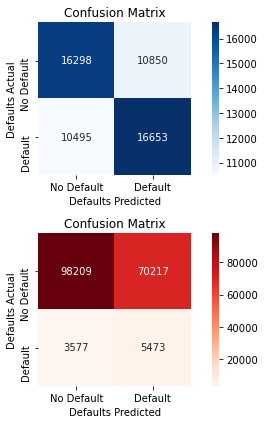

In [176]:
y_preds_nb = nb.predict(X_tr_rs)
y_preds_nb2 = nb.predict(X_val)


APRF2(y_tr_rs, y_preds_nb, y_val, y_preds_nb2)

In [178]:
X_tr_rs.shape

(54296, 1023)